In [42]:
import numpy as np
import pandas as pd
import hypothesis
import timeseries
import survival
import regression
import populations
import estimation
import thinkstats2
import thinkplot
import linear
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
data = pd.read_csv('San Francisco.csv', parse_dates=['last_review'])

In [63]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,217,2019-09-21,1.74,1,85
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,160,2019-09-30,1.28,3,62
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.87,1,0
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,2019-09-10,0.15,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,2018-09-12,0.13,9,365


In [22]:
data.corr()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.538222,NaN,0.031239,0.044824,0.019891,-0.004429,-0.477915,0.130241,0.255957,0.015059
host_id,0.538222,1.000000,NaN,0.034413,-0.010897,0.039385,-0.008532,-0.219828,0.162911,0.164720,0.062706
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.031239,0.034413,NaN,1.000000,0.187411,0.082657,-0.007426,-0.129835,-0.209606,0.211561,0.070422
longitude,0.044824,-0.010897,NaN,0.187411,1.000000,0.015202,0.002019,-0.125437,-0.165280,0.191847,0.026071
price,0.019891,0.039385,NaN,0.082657,0.015202,1.000000,-0.004239,-0.079882,-0.092808,-0.042428,-0.015229
minimum_nights,-0.004429,-0.008532,NaN,-0.007426,0.002019,-0.004239,1.000000,-0.005272,-0.009783,-0.004353,-0.013184
number_of_reviews,-0.477915,-0.219828,NaN,-0.129835,-0.125437,-0.079882,-0.005272,1.000000,0.618565,-0.196837,-0.045187
reviews_per_month,0.130241,0.162911,NaN,-0.209606,-0.165280,-0.092808,-0.009783,0.618565,1.000000,-0.168622,-0.077687
calculated_host_listings_count,0.255957,0.164720,NaN,0.211561,0.191847,-0.042428,-0.004353,-0.196837,-0.168622,1.000000,0.240140


In [30]:
Hotels = data[data.room_type == 'Hotel room'].price.values
Private = data[data.room_type == 'Private room'].price.values

Sampling distribution
+ mean, std, var diff, ci.Persentilles

In [53]:
dd1 = data.price.sample(100)
dd2 = data.price.sample(100)

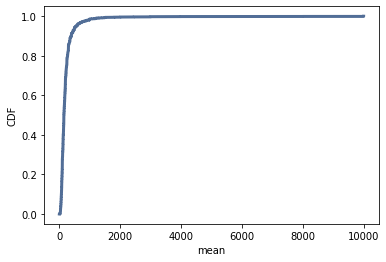

In [66]:
cdf = thinkstats2.Cdf(data.price)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='mean',
                 ylabel='CDF')

In [67]:
ci = cdf.Percentile(5), cdf.Percentile(80)
ci

(55, 269)

Hypothesis testing
+ dropna, mean, std, var diff, ht, pvalue
+ check with samples

In [69]:
DataT = Hotels, Private

In [74]:
ht = hypothesis.DiffMeansPermute(DataT)
ht.PValue()

0.819

In [75]:
ht = hypothesis.DiffStdPermute(DataT)
ht.PValue()

0.568

In [79]:
ht = hypothesis.CorrelationPermute(Hotels, Private)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [80]:
ht.actual, ht.MaxTestStat

(-309.3743648032,
 <bound method HypothesisTest.MaxTestStat of <hypothesis.DiffStdPermute object at 0x0000027FB9AE4588>>)

Chi test

In [84]:
stats.chisquare(Hotels[0:100], Private[0:100])

Power_divergenceResult(statistic=19738.00771069656, pvalue=0.0)

Least squares(regression analysis)
+ slopes, inters

In [20]:
rew = data.reviews_per_month.dropna().sample(100)
av = data.availability_365.dropna().sample(100)

In [21]:
inter, slope = thinkstats2.LeastSquares(rew, av)

In [22]:
inter + slope * 25

390.51112741876693

In [23]:
slope * 10

103.03905933301684

In [25]:
fit_xs, fit_ys = thinkstats2.FitLine(rew, inter, slope)

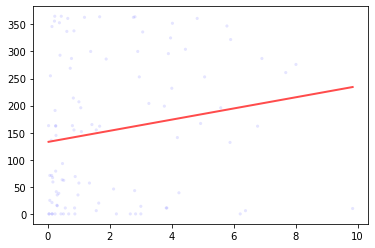

In [28]:
thinkplot.Scatter(rew, av, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel='',
                 ylabel='')

In [ ]:
data['residual'] = thinkstats2.Residuals(rew, av, inter, slope)

In [ ]:
bins = np.arange(0, 10, 3)
indices = np.digitize(dataSydney.Evaporation, bins)
groups = dataSydney.groupby(indices)

Eva_means = [group.Evaporation.mean() for _, group in groups][1:-1]
Eva_means

In [ ]:
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

In [ ]:
PlotPercentiles(Eva_means, cdfs)
thinkplot.Config()

Uncertainty

In [ ]:
inters, slopes = linear.SamplingDistributions(data.sample(100), iters=101)

In [44]:
for slope, inter in zip(slopes, inters):
    fxs, fys = FitLine(Eva_means, inter, slope)
    thinkplot.Plot(fxs, fys, color='gray', alpha=0.01)
    
thinkplot.Config(xlabel="",
                 ylabel='')

In [ ]:
PlotConfidenceIntervals(Eva_means, inters, slopes, percent=90, 
                        color='red', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(Eva_means, inters, slopes, percent=50,
                        color='black', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="",
                 ylabel='')

Multiple regression

In [46]:
formula = 'number_of_reviews ~ minimum_nights'
model = regression.smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      number_of_reviews   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2254
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.635
Time:                        12:39:34   Log-Likelihood:                -46891.
No. Observations:                8111   AIC:                         9.379e+04
Df Residuals:                    8109   BIC:                         9.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         45.2078      0.871     51.901      0.000      43.500      46.915
minimum_nights -3.724e-07   7.84e-07     -0.475      0.635   -1.91e-06    1.17e-06
==============================================================================
Omnibus:                     5147.339   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56235.779
Skew:                           2.962   Prob(JB):                         0.00
Kurtosis:                      14.458   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
inter = results.params['Intercept']
slope = results.params['minimum_nights']
inter, slope

(45.20777854665707, -3.7242475077943524e-07)

In [48]:
results.rsquared

2.7793910300166758e-05

In [ ]:
slope * #diff of mean

In [50]:
data['isHotel'] = data.room_type == 'Hotel room'
formula = 'minimum_nights ~ isHotel'
results = regression.smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         minimum_nights   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02622
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.871
Time:                        12:44:35   Log-Likelihood:            -1.2442e+05
No. Observations:                8111   AIC:                         2.488e+05
Df Residuals:                    8109   BIC:                         2.488e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.267e+04   1.25e+04      1.014      0.310   -1.18e+04    3.72e+04
isHotel[T.True] -1.266e+04   7.82e+04     -0.162      0.871   -1.66e+05    1.41e+05
==============================================================================
Omnibus:                    31228.964   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22216982201.494
Skew:                          90.044   Prob(JB):                         0.00
Kurtosis:                    8108.948   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
formula = 'minimum_nights ~ isHotel + price'
results = regression.smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         minimum_nights   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08710
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.917
Time:                        12:47:14   Log-Likelihood:            -1.2442e+05
No. Observations:                8111   AIC:                         2.488e+05
Df Residuals:                    8108   BIC:                         2.489e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.528e+04   1.42e+04      1.075      0.282   -1.26e+04    4.31e+04
isHotel[T.True]  -1.32e+04   7.82e+04     -0.169      0.866   -1.66e+05     1.4e+05
price             -11.5086     29.916     -0.385      0.700     -70.152      47.135
==============================================================================
Omnibus:                    31228.689   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22215359219.149
Skew:                          90.042   Prob(JB):                         0.00
Kurtosis:                    8108.652   Cond. No.                     2.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logistic regression

In [54]:
data['minimum_nights2'] = (data.minimum_nights == 2).astype(int)

In [56]:
model = regression.smf.logit('minimum_nights2 ~ price', data=data)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.488322
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        minimum_nights2   No. Observations:                 8111
Model:                          Logit   Df Residuals:                     8109
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Dec 2019   Pseudo R-squ.:               4.823e-05
Time:                        12:49:13   Log-Likelihood:                -3960.8
converged:                       True   LL-Null:                       -3961.0
Covariance Type:            nonrobust   LLR p-value:                    0.5365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4496      0.032    -45.646      0.000      -1.512      -1.387
price       4.016e-05   6.34e-05      0.633      0.527   -8.42e-05       0.000
==============================================================================
"""

In [57]:
model = regression.smf.logit('minimum_nights2 ~ price + reviews_per_month', data=data)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.518835
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        minimum_nights2   No. Observations:                 6506
Model:                          Logit   Df Residuals:                     6503
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Dec 2019   Pseudo R-squ.:                 0.03071
Time:                        12:50:10   Log-Likelihood:                -3375.5
converged:                       True   LL-Null:                       -3482.5
Covariance Type:            nonrobust   LLR p-value:                 3.546e-47
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.7053      0.050    -33.872      0.000      -1.804      -1.607
price                 0.0004      0.000      3.303      0.001       0.000       0.001
reviews_per_month     0.1934      0.013     14.427      0.000       0.167       0.220
=====================================================================================
"""

In [58]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [59]:
actual = endog['minimum_nights2']
baseline = actual.mean()
baseline

0.2267138026437135

In [60]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)


(8.0, 4965.0)

In [61]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
print('Accuracy = ', acc)

Accuracy =  0.7643713495235167


TSA

In [67]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,217,2019-09-21,1.74,1,85
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,160,2019-09-30,1.28,3,62
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.87,1,0
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,18,2019-09-10,0.15,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,2018-09-12,0.13,9,365


In [77]:
dailies = GroupByQualityAndDay(data)

ValueError: Grouper for 'reviews_per_month' not 1-dimensional

In [75]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('number_of_reviews')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

In [76]:
def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['reviews_per_month', 'reviews_per_month']].groupby('reviews_per_month')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily